# LVDT Voice Coil Simulation Plots
### Analyse the voice coil measurement of a reversed LVDT with geometry as used in ETpathfinder large IP. 

#### Import everything

In [19]:
import numpy as np
import cmath
import scipy.optimize as opt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Read in data
[0] = positions, 
[1] = upper outer coil forces,
[2] = lower outer coil forces, 
[3] = magnet forces
[4] = meta data: NSteps, StepSize, OutCoil_Current

In [20]:
files = ['RevLVDT_VC_DC_1A_32AWG_10mm_6_7_7.out',
         'RevLVDT_VC_DC_1A_31AWG_10mm_6_7_7.out',
         'RevLVDT_VC_DC_1A_30AWG_10mm_6_7_7.out',

        ]

legends = ['10mm_7_outlayers_32AWG',
           '10mm_7_outlayers_31AWG',
            '10mm_7_outlayers_30AWG',
          ]
inputdata = []
NSteps = []
StepSize = []
OutCoil_Current = []

for i in range(0,len(files)):
    inputarray = np.loadtxt(files[i])
    inputdata.append(inputarray)
    NSteps.append(int(inputarray[4][0]))
    StepSize.append(inputarray[4][1])
    OutCoil_Current.append(inputarray[4][2]) 

print(inputdata)
print(NSteps)
print(StepSize)
print(OutCoil_Current)

[array([[-5.        , -4.        , -3.        , -2.        , -1.        ,
         0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ],
       [-0.31574132, -0.32304409, -0.32961445, -0.33528679, -0.34001444,
        -0.34379303, -0.3463242 , -0.34769364, -0.34775394, -0.346469  ,
        -0.34373358],
       [-0.44147342, -0.4441498 , -0.44545552, -0.44536685, -0.44400084,
        -0.44139256, -0.43767566, -0.43286471, -0.42726803, -0.42064866,
        -0.41337554],
       [ 0.75727767,  0.7662118 ,  0.77726472,  0.78116864,  0.78436002,
         0.78512202,  0.78285382,  0.78044927,  0.77329683,  0.76587027,
         0.75789453],
       [10.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]]), array([[-5.        , -4.        , -3.        , -2.        , -1.        ,
         0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.

#### Analyse and plot output data
Basic plots:

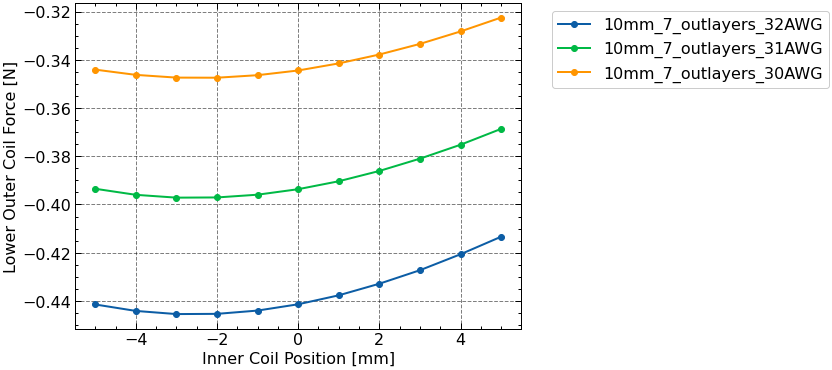

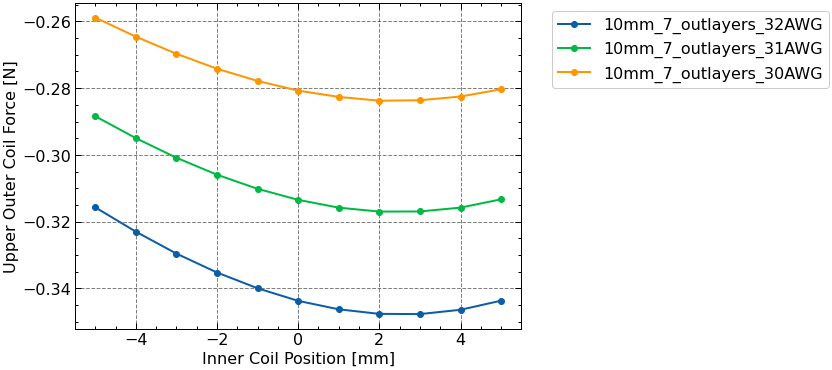

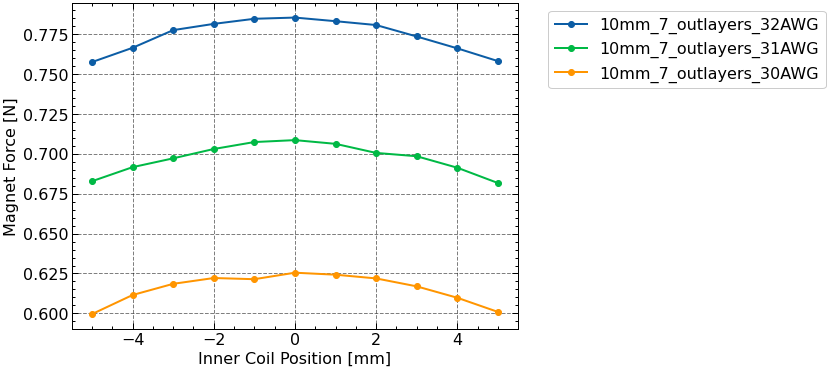

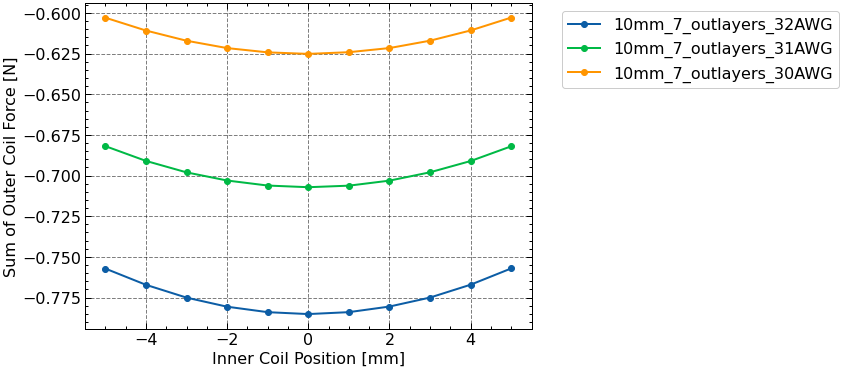

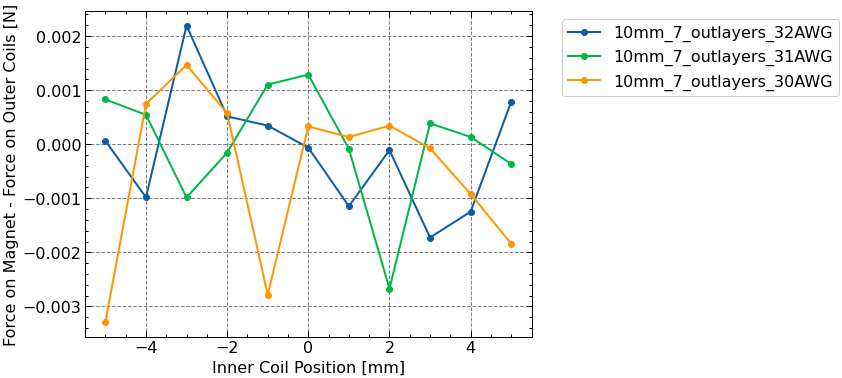

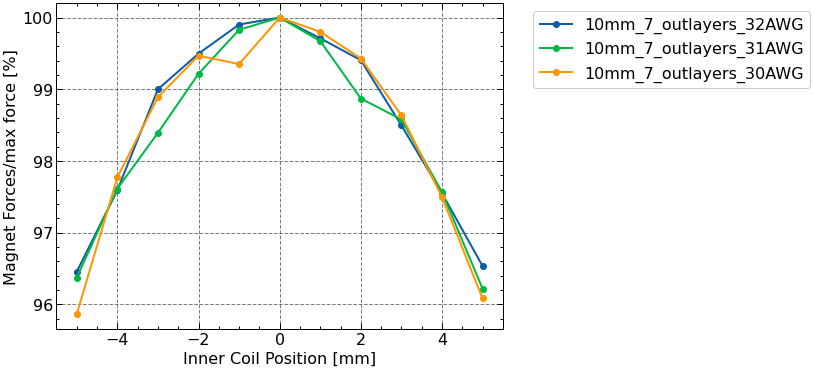

In [21]:
#print(plt.style.available)
plt.style.use(['science','grid','notebook'])

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2], 'o-', label=legends[i])
plt.ylabel('Lower Outer Coil Force [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][1], 'o-', label=legends[i])
plt.ylabel('Upper Outer Coil Force [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][3], 'o-', label=legends[i])
plt.ylabel('Magnet Force [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][2] + inputdata[i][1], 'o-', label=legends[i])
plt.ylabel('Sum of Outer Coil Force [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][3] - abs(inputdata[i][2] + inputdata[i][1]), 'o-', label=legends[i])
plt.ylabel('Force on Magnet - Force on Outer Coils [N]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], inputdata[i][3]/max(inputdata[i][3])*100, 'o-', label=legends[i])
plt.ylabel('Magnet Forces/max force [%]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
plt.show()

Create normalised response of magnet forces in N/A and fit with second order polynominal.

Fitted parameters of function: [-1.11461363e-03 -1.19367402e-04  7.84943373e-01]
Fitted parameters of function: [-1.00036083e-03 -8.12807279e-05  7.07062276e-01]
Fitted parameters of function: [-9.66245541e-04 -2.22225424e-05  6.25366439e-01]


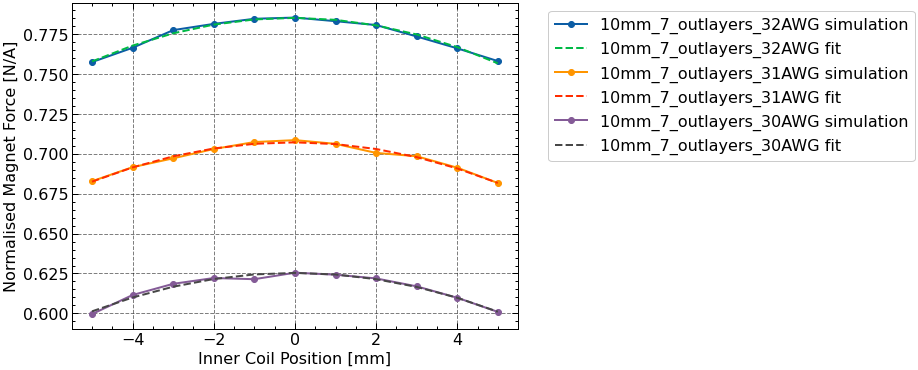

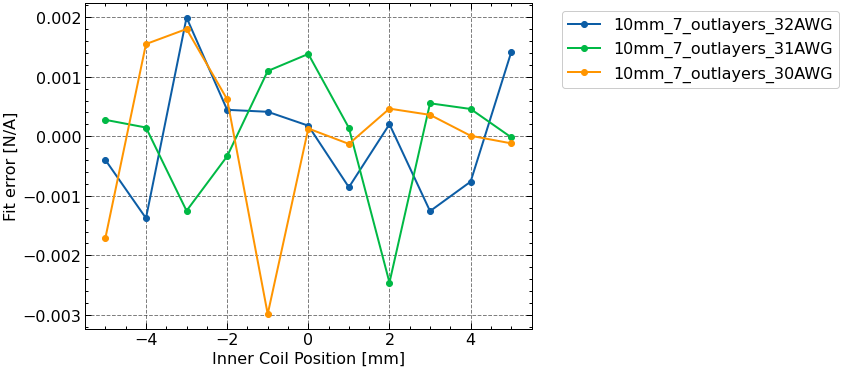

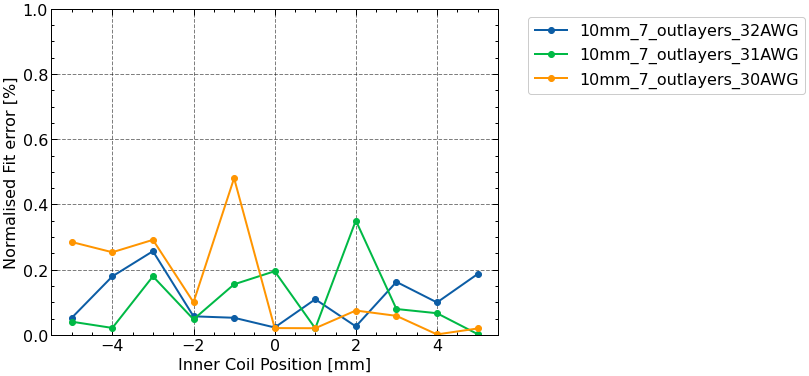

In [22]:
def polyfunc(x, a, b, c):
     return a*x**2 + b*x + c

Norm_Magnet_Forces = []
fitted_Norm_Magnet_Forces = []
for i in range(0,len(files)):
    Norm_Magnet_Forces.append(inputdata[i][3]/OutCoil_Current[i]) 
    optimizedParameters, pcov = opt.curve_fit(polyfunc, inputdata[i][0], inputdata[i][3]/OutCoil_Current[i])
    print("Fitted parameters of function:", optimizedParameters)
    fitted_Norm_Magnet_Forces.append(polyfunc(inputdata[i][0], *optimizedParameters))
    
for i in range(0,len(files)):    
    plt.plot(inputdata[i][0], Norm_Magnet_Forces[i], 'o-', label=legends[i] + " simulation")
    plt.plot(inputdata[i][0], fitted_Norm_Magnet_Forces[i], '--', label=legends[i] + " fit")
plt.ylabel('Normalised Magnet Force [N/A]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], Norm_Magnet_Forces[i] - fitted_Norm_Magnet_Forces[i], 'o-', label=legends[i])
plt.ylabel('Fit error [N/A]')
plt.xlabel('Inner Coil Position [mm]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
plt.show()

for i in range(0,len(files)):
    plt.plot(inputdata[i][0], abs(Norm_Magnet_Forces[i] - fitted_Norm_Magnet_Forces[i])/abs(Norm_Magnet_Forces[i])*100, 'o-', label=legends[i])
plt.ylabel('Normalised Fit error [%]')
plt.xlabel('Inner Coil Position [mm]')
plt.ylim(0.0,1.0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)
plt.show()